In [2]:
pip install requests beautifulsoup4 imdbpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.2/297.2 kB 9.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [8]:
from imdb import IMDb
import pandas as pd

file_path = '/Users/aneesMohammed/Downloads/Movie_List.csv'
movies_df = pd.read_csv(file_path, encoding='latin1')

# Initialize IMDb instance
ia = IMDb()

# Function to fetch IMDb rating for a given movie title
def fetch_imdb_rating(title):
    try:
        print(f"Searching IMDb for movie: {title}")
        # Search for the movie on IMDb
        search_results = ia.search_movie(title)
        if search_results:
            print(f"Found results for {title}: {search_results[0]}")
            # Get the first result's ID and fetch details
            movie = ia.get_movie(search_results[0].movieID)
            rating = movie.get('rating')
            print(f"IMDb Rating for {title}: {rating}")
            return rating  # Fetch IMDb rating
        else:
            print(f"No results found for {title}")
    except Exception as e:
        print(f"Error fetching rating for {title}: {e}")
    return None

# Apply the function only to the first 5 rows for testing
movies_df['IMDb_Rating'] = movies_df['Title'].head(5).apply(fetch_imdb_rating)

# Save the first 5 rows with IMDb ratings to a new CSV for verification
movies_df.head(5).to_csv('/Users/aneesMohammed/Downloads/Movie_List_with_IMDb_Ratings_Sample.csv', index=False)

# Display the first few rows to verify
print("Sample data with IMDb ratings:")
print(movies_df.head(5))


Searching IMDb for movie: Aaghaaz 
Found results for Aaghaaz : Aaghaaz
IMDb Rating for Aaghaaz : 4.7
Searching IMDb for movie: Aaj Ka Ravan
Found results for Aaj Ka Ravan: Aaj Ka Ravan
IMDb Rating for Aaj Ka Ravan: 4.3
Searching IMDb for movie: Anjaane
Found results for Anjaane: Do Anjaane
IMDb Rating for Anjaane: 6.7
Searching IMDb for movie: Anokha Moti
Found results for Anokha Moti: Anokha Moti
IMDb Rating for Anokha Moti: 7.2
Searching IMDb for movie: Apradhi Kaun
Found results for Apradhi Kaun: Apradhi Kaun
IMDb Rating for Apradhi Kaun: None
Sample data with IMDb ratings:
   Movie_ID         Title  Year     Genre  IMDb_Rating
0     34759      Aaghaaz   2000  Thriller          4.7
1     34760  Aaj Ka Ravan  2000     Drama          4.3
2     34761       Anjaane  2000   Romance          6.7
3     34762   Anokha Moti  2000    Family          7.2
4     34763  Apradhi Kaun  2000  Thriller          NaN


In [12]:
movies_df.size


10445

In [16]:
from imdb import IMDb
import pandas as pd

file_path = '/Users/aneesMohammed/Downloads/Movie_List.csv'
movies_df = pd.read_csv(file_path, encoding='latin1')

ia = IMDb()

def fetch_imdb_rating(title):
    try:
        print(f"Searching IMDb for movie: {title}")
        # Search for the movie on IMDb
        search_results = ia.search_movie(title)
        if search_results:
            # Get the first result's ID and fetch details
            movie = ia.get_movie(search_results[0].movieID)
            rating = movie.get('rating')
            return rating  # Fetch IMDb rating
    except Exception as e:
        print(f"Error fetching rating for {title}: {e}")
    return None

# Process all rows and track progress
print("Fetching IMDb ratings for all movies...")
for index, row in movies_df.iterrows():
    movies_df.at[index, 'IMDb_Rating'] = fetch_imdb_rating(row['Title'])
    
    # Print progress every 50 movies
    if (index + 1) % 50 == 0:
        print(f"Processed {index + 1} movies...")

# Save the updated dataset to a new CSV file
output_path = '/Users/aneesMohammed/Downloads/Movie_List_with_IMDb_Ratings.csv'
movies_df.to_csv(output_path, index=False)

# Display completion message and verify first few rows
print("IMDb ratings fetching completed successfully!")
print(movies_df.head(10))


Fetching IMDb ratings for all movies...
Searching IMDb for movie: Aaghaaz 
Searching IMDb for movie: Aaj Ka Ravan
Searching IMDb for movie: Anjaane
Searching IMDb for movie: Anokha Moti
Searching IMDb for movie: Apradhi Kaun
Searching IMDb for movie: Astitva
Searching IMDb for movie: Baaghi
Searching IMDb for movie: Badal
Searching IMDb for movie: Bas Yaari Rakho
Searching IMDb for movie: Bawandar
Searching IMDb for movie: Beti No.1
Searching IMDb for movie: Bhai Thakur
Searching IMDb for movie: Bichhoo
Searching IMDb for movie: Billa No. 786
Searching IMDb for movie: Bulandi
Searching IMDb for movie: Chal Mere Bhai
Searching IMDb for movie: Champion
Searching IMDb for movie: Dahshat
Searching IMDb for movie: Deewane
Searching IMDb for movie: Dhai Akshar Prem Ke
Searching IMDb for movie: Dhadkan
Searching IMDb for movie: Dil Ki Dhadkan
Searching IMDb for movie: Dil Pe Mat Le Yaar
Searching IMDb for movie: Dr. Babasaheb Ambedkar
Searching IMDb for movie: Dr Mukta
Searching IMDb for movi

2024-12-16 20:00:31,334 CRITICAL [imdbpy] /opt/anaconda3/lib/python3.12/site-packages/imdb/_exceptions.py:32: IMDbDataAccessError exception raised; args: ({'errcode': None, 'errmsg': 'None', 'url': 'https://www.imdb.com/title/tt0088580/reference', 'proxy': '', 'exception type': 'IOError', 'original exception': TimeoutError('The read operation timed out')},); kwds: {}
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/imdb/parser/http/__init__.py", line 233, in retrieve_unicode
    response = uopener.open(url)
               ^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/urllib/request.py", line 515, in open
    response = self._open(req, data)
               ^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/urllib/request.py", line 532, in _open
    result = self._call_chain(self.handle_open, protocol, protocol +
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/urllib/reques

Error fetching rating for Neighbours: {'errcode': None, 'errmsg': 'None', 'url': 'https://www.imdb.com/title/tt0088580/reference', 'proxy': '', 'exception type': 'IOError', 'original exception': TimeoutError('The read operation timed out')}
Searching IMDb for movie: W
Searching IMDb for movie: Ankhon Dekhi
Searching IMDb for movie: Gang of Ghosts
Searching IMDb for movie: Lakshmi
Searching IMDb for movie: Ragini MMS 2
Searching IMDb for movie: Dishkiyaoon
Searching IMDb for movie: O Teri
Searching IMDb for movie: Station
Searching IMDb for movie: Youngistaan
Searching IMDb for movie: Ebn-E-Batuta
Searching IMDb for movie: Honour Killing
Searching IMDb for movie: Jal
Searching IMDb for movie: Main Tera Hero
Processed 1450 movies...
Searching IMDb for movie: Bhoothnath Returns
Searching IMDb for movie: 2 States
Searching IMDb for movie: Dekh Tamasha Dekh
Searching IMDb for movie: Lucky Kabootar
Searching IMDb for movie: Kaanchi: The Unbreakable
Searching IMDb for movie: Revolver Rani
Sea

2024-12-16 20:41:35,083 CRITICAL [imdbpy] /opt/anaconda3/lib/python3.12/site-packages/imdb/_exceptions.py:32: IMDbDataAccessError exception raised; args: ({'errcode': None, 'errmsg': 'None', 'url': 'https://www.imdb.com/title/tt7255568/plotsummary', 'proxy': '', 'exception type': 'IOError', 'original exception': URLError(TimeoutError('timed out'))},); kwds: {}
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/urllib/request.py", line 1344, in do_open
    h.request(req.get_method(), req.selector, req.data, headers,
  File "/opt/anaconda3/lib/python3.12/http/client.py", line 1336, in request
    self._send_request(method, url, body, headers, encode_chunked)
  File "/opt/anaconda3/lib/python3.12/http/client.py", line 1382, in _send_request
    self.endheaders(body, encode_chunked=encode_chunked)
  File "/opt/anaconda3/lib/python3.12/http/client.py", line 1331, in endheaders
    self._send_output(message_body, encode_chunked=encode_chunked)
  File "/opt/anaconda3/lib

Error fetching rating for Student of the Year 2: {'errcode': None, 'errmsg': 'None', 'url': 'https://www.imdb.com/title/tt7255568/plotsummary', 'proxy': '', 'exception type': 'IOError', 'original exception': URLError(TimeoutError('timed out'))}
Searching IMDb for movie: De De Pyaar De
Searching IMDb for movie: India's Most Wanted
Searching IMDb for movie: PM Narendra Modi
Searching IMDb for movie: Bharat
Searching IMDb for movie: Khamoshi
Searching IMDb for movie: Kabir Singh
Searching IMDb for movie: Article 15
Searching IMDb for movie: Malaal
Searching IMDb for movie: One Day: Justice Delivered
Searching IMDb for movie: Hume Tumse Pyaar Kitna
Searching IMDb for movie: Super 30
Processed 2050 movies...
Searching IMDb for movie: Family of Thakurganj
Searching IMDb for movie: Jhootha Kahin Ka
Searching IMDb for movie: Judgementall Hai Kya
Searching IMDb for movie: Arjun Patiala
Searching IMDb for movie: Khandaani Shafakhana
Searching IMDb for movie: Jabariya Jodi
Searching IMDb for movi

In [22]:
pip install dash

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 18.8 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [36]:
pip install dash plotly pandas


Note: you may need to restart the kernel to use updated packages.


# Slider With IMdb rating range

In [542]:
import dash
from dash import dcc, html, Input, Output
import pandas as pd
import plotly.express as px

file_path = '/Users/aneesMohammed/Downloads/Movie_List_with_IMDb_Ratings.csv'
movies_df = pd.read_csv(file_path)

movies_df.dropna(subset=['IMDb_Rating', 'Genre', 'Year'], inplace=True)
movies_df['Genre'] = movies_df['Genre'].fillna('Unknown')

app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("Interactive Movie Dashboard", style={'textAlign': 'center', 'color': '#003366'}),

    html.Div([
        html.Label("Select IMDb Rating Range:", style={'fontSize': '18px'}),
        dcc.RangeSlider(
            id='rating-slider',
            min=0, max=10, step=0.5,
            marks={i: str(i) for i in range(0, 11)},
            value=[5, 10]
        ),
    ], style={'width': '50%', 'margin': 'auto', 'padding': '10px', 'border': '1px solid #ddd', 'borderRadius': '5px'}),

    html.Br(),

    dcc.Graph(id='movies-by-genre'),
    dcc.Graph(id='movies-by-year'),
    dcc.Graph(id='top-10-movies'),
])

@app.callback(
    [Output('movies-by-genre', 'figure'),
     Output('movies-by-year', 'figure'),
     Output('top-10-movies', 'figure')],
    [Input('rating-slider', 'value')]
)
def update_charts(rating_range):
    filtered_df = movies_df[
        (movies_df['IMDb_Rating'] >= rating_range[0]) & 
        (movies_df['IMDb_Rating'] <= rating_range[1])
    ]
    
    exploded_genres = filtered_df.assign(Genre=filtered_df['Genre'].str.split(',')).explode('Genre')
    exploded_genres['Genre'] = exploded_genres['Genre'].str.strip()
    exploded_genres['Genre'] = exploded_genres['Genre'].replace('', 'Commercial')
    exploded_genres['Genre'] = exploded_genres['Genre'].fillna('Commercial')
    exploded_genres['Genre'] = exploded_genres['Genre'].apply(lambda x: 'Commercial' if x == '' else x)
    
    genre_count = exploded_genres['Genre'].value_counts().reset_index()
    genre_count.columns = ['Genre', 'Count']
    
    genre_fig = px.bar(
        genre_count.head(10), 
        x='Genre', y='Count',
        title="Top 10 Genres by Number of Movies",
        color='Genre',
        color_discrete_sequence=['#1F77B4', '#4DAF4A', '#FF7F0E', '#D62728', '#9467BD', 
                                 '#17BECF', '#8C564B', '#E377C2', '#7F7F7F', '#2CA02C']
    )
    
    genre_fig.update_traces(
        marker=dict(
            line=dict(
                color='white',
                width=1
            )
        )
    )
    
    genre_fig.update_layout(
        xaxis=dict(
            title="Genres",
            tickfont=dict(family='Montserrat, Arial', size=12, color='#333333'),
            showgrid=False,
            showline=True,
            linecolor='#2E2E2E',
            linewidth=1.5,
        ),
        yaxis=dict(
            title="Number of Movies",
            tickfont=dict(family='Montserrat, Arial', size=12, color='#333333'),
            showgrid=True,
            gridcolor='#DDDDDD',
            gridwidth=0.5,
            showline=True,
            linecolor='#2E2E2E',
            linewidth=1.5,
        ),
        plot_bgcolor="#FAFAFA",
        title=dict(
            text="Top 10 Genres by Number of Movies",
            font=dict(family='Montserrat, Arial', size=18, color='#333333'),
            x=0.5
        ),
        margin=dict(l=50, r=50, t=70, b=50)
    )
    
    year_count = filtered_df['Year'].value_counts().reset_index()
    year_count.columns = ['Year', 'Count']
    
    year_fig = px.line(
        year_count.sort_values('Year'), 
        x='Year', y='Count',
        title="Number of Movies Released Over the Years",
        markers=True,
        color_discrete_sequence=['#007FFF']
    )
    
    year_fig.update_traces(
        line=dict(color='#007FFF', width=2),
        marker=dict(
            color='#FF4500',
            size=8,
            line=dict(color='white', width=1.5)
        )
    )
    
    year_fig.update_layout(
        xaxis=dict(
            title="Year",
            tickfont=dict(family='Montserrat, Arial', size=12, color='#333333'),
            showgrid=True,
            gridcolor='#DDDDDD',
            gridwidth=0.5,
            showline=True,
            linecolor='#2E2E2E',
            linewidth=1.5,
            dtick=1
        ),
        yaxis=dict(
            title="Number of Movies Released",
            range=[0, year_count['Count'].max() + 5],
            tickfont=dict(family='Montserrat, Arial', size=12, color='#333333'),
            showgrid=True,
            gridcolor='#DDDDDD',
            gridwidth=0.5,
            showline=True,
            linecolor='#2E2E2E',
            linewidth=1.5,
            dtick=5
        ),
        plot_bgcolor="#FAFAFA",
        title=dict(
            text="Number of Movies Released Over the Years",
            font=dict(family='Montserrat, Arial', size=18, color='#333333'),
            x=0.5
        ),
        margin=dict(l=50, r=50, t=70, b=50)
    )
    
    top_10_movies = filtered_df.nlargest(10, 'IMDb_Rating')

    top_movies_fig = px.bar(
        top_10_movies, 
        x='Title', y='IMDb_Rating',
        title="Top 10 Movies by IMDb Rating",
        color='IMDb_Rating',
        color_continuous_scale=['#FF6F61', '#6B5B95', '#88B04B', '#92A8D1', '#F7CAC9', '#955251', '#B565A7', '#009B77', '#DD4124', '#45B8AC']
    )
    
    top_movies_fig.update_traces(
        marker=dict(
            line=dict(
                color='white',
                width=1
            )
        )
    )
    
    top_movies_fig.update_layout(
        xaxis=dict(
            title="Movie Titles",
            categoryorder='total descending',
            tickfont=dict(family='Montserrat, Arial', size=12, color='#333333'),
            showgrid=False,
            showline=True,
            linecolor='#2E2E2E',
            linewidth=1.5,
        ),
        yaxis=dict(
            title="IMDb Rating",
            tickfont=dict(family='Montserrat, Arial', size=12, color='#333333'),
            showgrid=True,
            gridcolor='#DDDDDD',
            gridwidth=0.5,
            showline=True,
            linecolor='#2E2E2E',
            linewidth=1.5,
        ),
        plot_bgcolor="#FAFAFA",
        title=dict(
            text="Top 10 Movies by IMDb Rating",
            font=dict(family='Montserrat, Arial', size=18, color='#333333'),
            x=0.5
        ),
        margin=dict(l=50, r=50, t=70, b=50)
    )
    
    return genre_fig, year_fig, top_movies_fig

if __name__ == '__main__':
    app.run_server(debug=True)


# Plotly Bubble Chart with Year Slider

In [534]:
import pandas as pd
import plotly.express as px
from dash import Dash, dcc, html, Input, Output

file_path = '/Users/aneesMohammed/Downloads/Movie_List_with_IMDb_Ratings.csv'
movies_df = pd.read_csv(file_path)

movies_df.dropna(subset=['Title', 'IMDb_Rating', 'Year'], inplace=True)

app = Dash(__name__)

app.layout = html.Div([
    html.H1("Top IMDb Rated Movies - Interactive Scatter Plot", style={'textAlign': 'center'}),

    html.Label("Select Year:"),
    dcc.Slider(
        id='year-slider',
        min=movies_df['Year'].min(),
        max=movies_df['Year'].max(),
        step=1,
        marks={int(year): str(int(year)) for year in range(movies_df['Year'].min(), movies_df['Year'].max() + 1, 2)},
        value=2010
    ),

    dcc.Graph(id='bubble-chart')
])

@app.callback(
    Output('bubble-chart', 'figure'),
    [Input('year-slider', 'value')]
)
def update_bubble_chart(selected_year):
    filtered_df = movies_df[movies_df['Year'] == selected_year].dropna(subset=['Title', 'IMDb_Rating'])
    filtered_df = filtered_df.sort_values(by='IMDb_Rating', ascending=False).head(15)
    
    fig = px.scatter(
        filtered_df,
        x='Title',
        y='IMDb_Rating',
        size='IMDb_Rating',
        color='Title',
        title=f"Top 15 IMDb Rated Movies in {selected_year}",
        template='plotly_white',
        color_discrete_sequence=[
            '#FF6F61', '#6B5B95', '#88B04B', '#92A8D1', '#F7CAC9',
            '#955251', '#B565A7', '#009B77', '#DD4124', '#45B8AC',
            '#EFC050', '#5B5EA6', '#9B2335', '#F2AA4C', '#A0DAA9'
        ]
    )

    fig.update_traces(
        textposition='bottom center',
        marker=dict(line=dict(width=1, color='DarkSlateGray'))
    )
    fig.update_layout(
        xaxis=dict(
            title='',
            tickangle=45,
            tickmode='array',
            tickvals=filtered_df['Title']
        ),
        yaxis=dict(
            title='IMDb Rating',
            showgrid=True,
            gridcolor='lightgray'
        ),
        margin=dict(l=50, r=50, t=100, b=200),
        height=700,
        width=1200,
        title_x=0.5,
        font=dict(size=14, family="Arial"),
        showlegend=False
    )
    return fig

if __name__ == '__main__':
    app.run_server(debug=True)


In [84]:
pip install --upgrade plotly


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 22.9 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: plotly
    Found existing installation: plotly 5.22.0
    Uninstalling plotly-5.22.0:
      Successfully uninstalled plotly-5.22.0
Note: you may need to restart the kernel to use updated packages.


# Movie Recommendation System based on genre


In [530]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from dash import Dash, html, dcc, Input, Output, State
import dash_table
import plotly.express as px
import re

file_path = '/Users/aneesMohammed/Downloads/Movie_List_with_IMDb_Ratings.csv'
movies_df = pd.read_csv(file_path)
movies_df = movies_df.dropna(subset=['Title', 'Genre', 'IMDb_Rating'])

def split_genres(genre_str):
    cleaned = re.sub(r'[/&]', ',', genre_str)  # replace / and & with commas
    return [g.strip() for g in cleaned.split(',') if g.strip()]

movies_df['Genre'] = movies_df['Genre'].apply(split_genres)

all_genres = set()
for g_list in movies_df['Genre']:
    all_genres.update(g_list)
all_genres = sorted(all_genres)

def encode_genres(genre_list):
    return [1 if genre in genre_list else 0 for genre in all_genres]

movies_df['Genre_Vector'] = movies_df['Genre'].apply(encode_genres)
genre_matrix = np.vstack(movies_df['Genre_Vector'].values)
similarity_matrix = cosine_similarity(genre_matrix)
title_to_index = {title: i for i, title in enumerate(movies_df['Title'])}

def find_closest_titles(partial_title):
    partial_title = partial_title.lower()
    matches = [t for t in movies_df['Title'] if partial_title in t.lower()]
    return matches

def recommend_similar_movies(movie_title, top_n=10, min_rating=0.0, min_similarity=0.1):
    if movie_title not in title_to_index:
        return pd.DataFrame()
    
    movie_idx = title_to_index[movie_title]
    scores = similarity_matrix[movie_idx]
    similar_indices = [i for i, s in enumerate(scores) if i != movie_idx and s >= min_similarity]
    if not similar_indices:
        return pd.DataFrame()
    
    candidates = [(idx, scores[idx], movies_df.iloc[idx]['IMDb_Rating']) for idx in similar_indices]
    candidates = [c for c in candidates if c[2] >= min_rating]
    if not candidates:
        return pd.DataFrame()
    
    candidates = sorted(candidates, key=lambda x: (x[1], x[2]), reverse=True)
    top_results = [c[0] for c in candidates[:top_n]]
    recommendations = movies_df.iloc[top_results][['Title', 'Genre', 'IMDb_Rating']]
    recommendations['Genre'] = recommendations['Genre'].apply(lambda g_list: ", ".join(g_list))
    return recommendations

app = Dash(__name__)

# Main container styling with padding and light background
app.layout = html.Div(style={
    'fontFamily': "'Open Sans', sans-serif", 
    'padding': '40px', 
    'backgroundColor': '#F9F9F9'
}, children=[
    html.H1("Movie Recommendations", style={'textAlign': 'center', 'color': '#333', 'marginBottom':'40px', 'fontWeight':'bold'}),

    # Card-like container for inputs
    html.Div(style={
        'backgroundColor': '#FFFFFF',
        'padding': '20px',
        'borderRadius': '8px',
        'boxShadow': '0 2px 5px rgba(0,0,0,0.1)',
        'maxWidth': '500px',
        'margin': '0 auto'
    }, children=[
        html.Label("Movie Title:", style={'display': 'block', 'marginBottom':'10px', 'color':'#333', 'fontWeight':'600'}),
        dcc.Input(id='movie-title', type='text', placeholder="Enter movie title", style={'width': '100%', 'padding':'8px', 'marginBottom':'20px', 'borderRadius':'4px', 'border':'1px solid #CCC'}),

        html.Label("Minimum IMDb Rating:", style={'display': 'block', 'marginBottom':'10px', 'color':'#333', 'fontWeight':'600'}),
        html.Div([
            dcc.Input(id='min-rating', type='number', placeholder="0.0", min=0, max=10, step=0.1, 
                      style={'width': '100px', 'padding':'8px','borderRadius':'4px','border':'1px solid #CCC'}),
            html.Span(" (optional)", style={'marginLeft': '10px','color':'#555'})
        ], style={'marginBottom': '20px'}),

        html.Label("Number of Recommendations:", style={'display': 'block', 'marginBottom':'10px', 'color':'#333', 'fontWeight':'600'}),
        html.Div([
            dcc.Input(id='top-n', type='number', placeholder="10", min=1, step=1, 
                      style={'width': '100px','padding':'8px','borderRadius':'4px','border':'1px solid #CCC'}),
            html.Span(" (default 10)", style={'marginLeft': '10px','color':'#555'})
        ], style={'marginBottom': '20px'}),

        # Styled button
        html.Button("Get Recommendations", 
                    id='submit-button', n_clicks=0, 
                    style={
                        'backgroundColor': '#007B7F',
                        'color': '#FFF',
                        'border': 'none',
                        'borderRadius': '4px',
                        'padding': '10px 20px',
                        'cursor': 'pointer',
                        'fontWeight': '600'
                    }
                   )
    ]),

    html.Div(id='potential-matches', style={'marginTop': '40px', 'marginBottom': '40px', 'color': 'blue', 'textAlign':'center'}),
    html.Div(id='chart-container', style={'marginTop': '20px'})
])

@app.callback(
    Output('potential-matches', 'children'),
    Output('chart-container', 'children'),
    Input('submit-button', 'n_clicks'),
    State('movie-title', 'value'),
    State('min-rating', 'value'),
    State('top-n', 'value')
)
def update_recommendations(n_clicks, movie_title, min_rating, top_n):
    if n_clicks == 0:
        return "", ""
    if not movie_title or movie_title.strip() == "":
        return "Please enter a movie title.", ""
    
    movie_title = movie_title.strip()
    min_rating = float(min_rating) if min_rating else 0.0
    top_n = int(top_n) if top_n else 10

    if movie_title not in title_to_index:
        potential_matches = find_closest_titles(movie_title)
        if not potential_matches:
            return f"Movie '{movie_title}' not found and no similar titles found.", ""
        else:
            return [html.Div([
                html.Div(f"No exact match for '{movie_title}'. Did you mean:", style={'marginBottom':'10px','fontWeight':'600'}),
                html.Div([html.Button(pm, id={'type':'match-button','index':pm}, n_clicks=0, 
                                      style={
                                          'margin':'5px',
                                          'backgroundColor':'#ECECEC',
                                          'border':'1px solid #CCC',
                                          'borderRadius':'4px',
                                          'cursor':'pointer'
                                      }) 
                          for pm in potential_matches]),
                html.Div("Click a button above to select the correct title.", style={'marginTop':'10px','color':'#555'})
            ], style={'textAlign':'center'})], ""
    
    # Exact match found, get recommendations
    results = recommend_similar_movies(movie_title, top_n=top_n, min_rating=min_rating, min_similarity=0.1)
    if results.empty:
        return "", f"No recommendations found for '{movie_title}' with min IMDb rating {min_rating}."
    
    # Create a bar chart
    results = results.sort_values(by='IMDb_Rating', ascending=False)
    fig = px.bar(
        results,
        x='Title',
        y='IMDb_Rating',
        color='IMDb_Rating',
        title=f"Top {len(results)} Movies Similar to {movie_title}",
        template='plotly_white',
        height=500,
        color_continuous_scale=[
        '#4A90E2',  # Sky Blue
        '#50E3C2',  # Turquoise
        '#B8E986',  # Light Green
        '#417505',  # Dark Olive
        '#2C3E50',  # Midnight Blue
        '#7F8C8D'   # Gray Blue
        ]
    )
    fig.update_layout(
        xaxis_title="Movie Titles",
        yaxis_title="IMDb Rating",
        title_x=0.5,
        font=dict(family='Open Sans', color='#333')
    )
    
    return "", dcc.Graph(figure=fig)

if __name__ == '__main__':
    app.run_server(debug=True)


# Box Plot For IMDb Rating Distribution by Top10 Genres

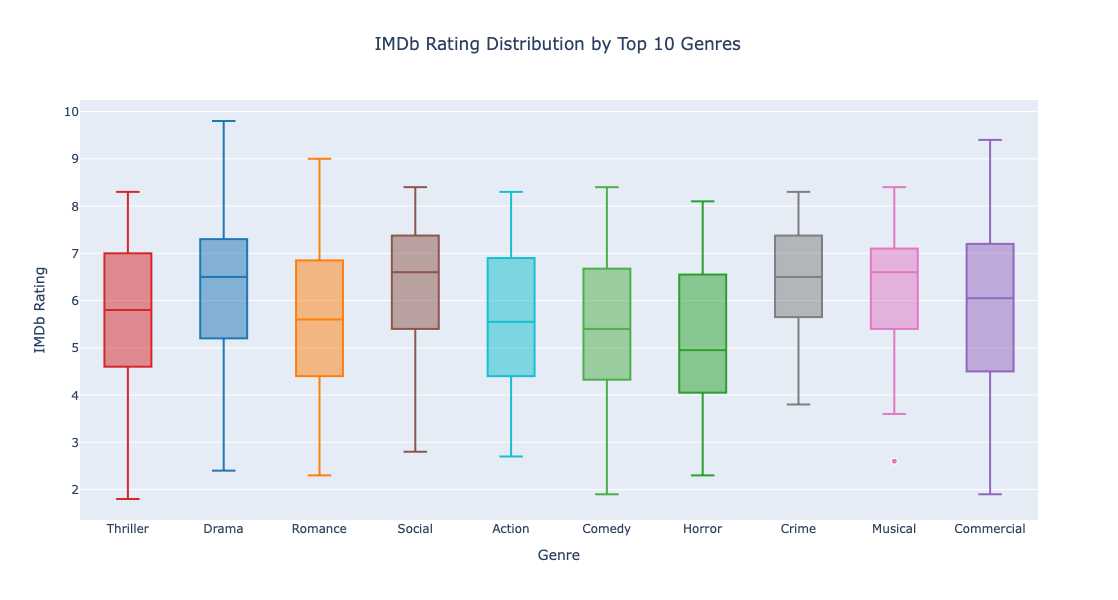

In [538]:
import pandas as pd
import plotly.express as px

# Explode genres into separate rows
genre_exploded = movies_df.assign(Genre=movies_df['Genre'].str.split(',')).explode('Genre')
genre_exploded['Genre'] = genre_exploded['Genre'].str.strip()
genre_exploded['Genre'] = genre_exploded['Genre'].replace('', 'Commercial')  # Empty strings
genre_exploded['Genre'] = genre_exploded['Genre'].fillna('Commercial')  # NaN values
genre_exploded['Genre'] = genre_exploded['Genre'].apply(lambda x: 'Commercial' if x == '' else x)
# Filter down to top 10 most common genres for clarity
top_genres = genre_exploded['Genre'].value_counts().head(10).index
filtered = genre_exploded[genre_exploded['Genre'].isin(top_genres)]

# Create a box plot comparing the distribution of IMDb ratings across these top genres
fig = px.box(
    filtered,
    x='Genre',
    y='IMDb_Rating',
    title="IMDb Rating Distribution by Top 10 Genres",
    color='Genre',
    color_discrete_sequence = ['#D62728', '#1F77B4', '#FF7F0E', '#8C564B', '#17BECF', '#4DAF4A', '#2CA02C', '#7F7F7F', '#E377C2', '#9467BD']

)

fig.update_layout(
    width = 1200,
    height = 600,
    xaxis_title="Genre",
    yaxis_title="IMDb Rating",
    title_x=0.5,
    showlegend=False
)
fig.update_traces(
    marker=dict(
        line=dict(
            color='white',  # Border color
            width=1         # Border width
        )
    )
)
fig.show()


# Genre Co-occurence Network


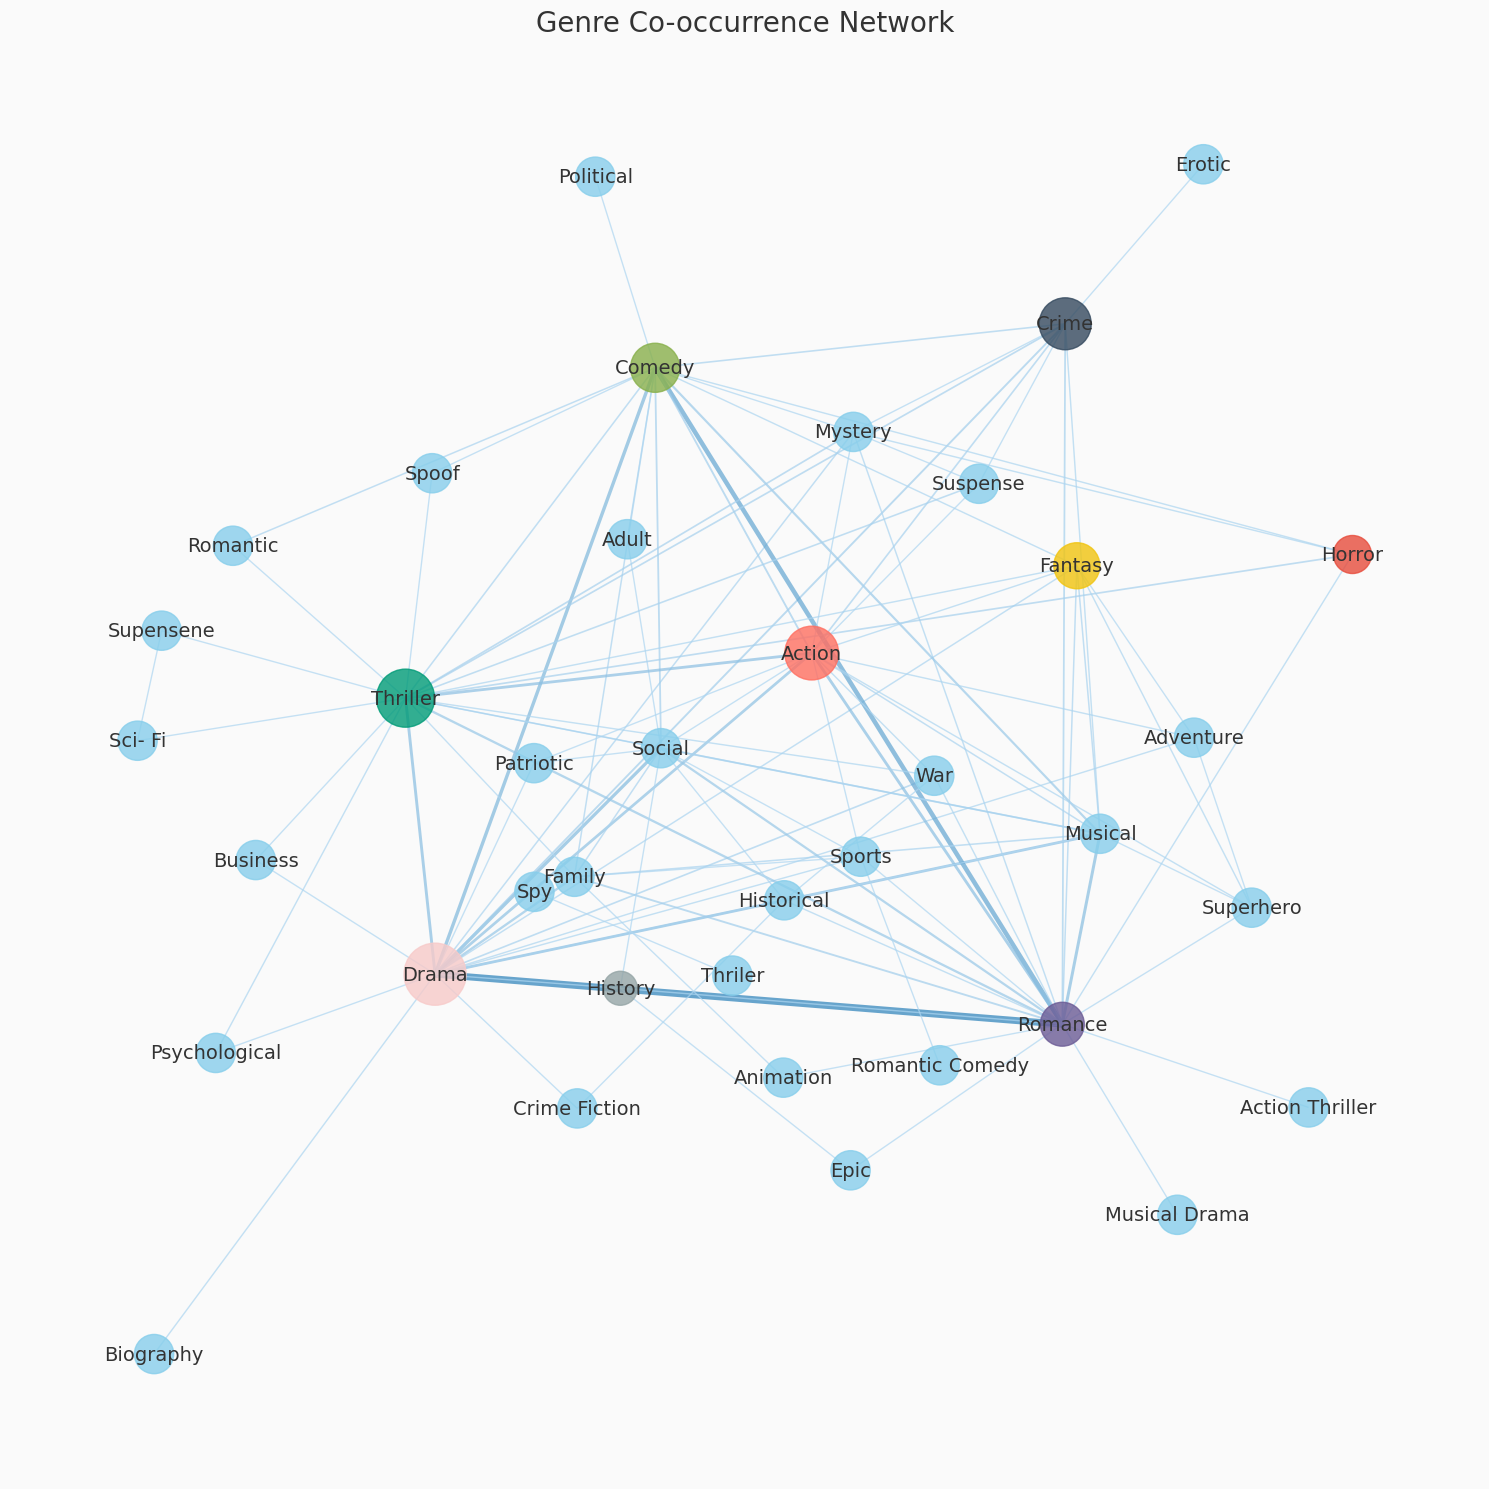

In [540]:
import pandas as pd
import itertools
import networkx as nx
import matplotlib.pyplot as plt
import re

# Define custom mappings
node_size_map = {
    'Action': 30, 'Comedy': 25, 'Drama': 40, 'Thriller': 35, 'Horror': 15,
    'Romance': 20, 'Sci-Fi': 18, 'Crime': 28, 'Fantasy': 22, 'History': 12
}

node_color_map = {
    'Action': '#FF6F61', 'Comedy': '#88B04B', 'Drama': '#F7CAC9',
    'Thriller': '#009B77', 'Horror': '#E74C3C', 'Romance': '#6B5B95',
    'Sci-Fi': '#5DADE2', 'Crime': '#34495E', 'Fantasy': '#F1C40F', 'History': '#95A5A6'
}

def hex_to_rgb(hex_color):
    hex_color = hex_color.lstrip('#')
    return tuple(int(hex_color[i:i+2], 16) for i in (0, 2, 4))

def interpolate_color(c1, c2, t):
    return tuple(int(c1[i] + (c2[i]-c1[i])*t) for i in range(3))

def rgb_to_hex(rgb):
    return '#{:02x}{:02x}{:02x}'.format(*rgb)

def clean_genre_name(genre):
    # Convert to title case
    genre = genre.title()

    # If you need to handle concatenated genres like "Crimeaction", you can use a regex
    # to insert a space before capital letters (except the first one).
    # For example:
    genre = re.sub(r'(?<!^)(?=[A-Z])', ' ', genre)

    # Trim extra spaces and re-title in case splitting added lowercase
    genre = ' '.join(word.capitalize() for word in genre.split())

    return genre

# Load your movies data here
# movies_df = pd.read_csv("movies.csv")

# 1. Explode genres and clean names
# After exploding
genre_exploded = movies_df.assign(Genre=movies_df['Genre'].str.split(',')).explode('Genre')

# Reset the index to avoid duplicate index issues after explode
genre_exploded = genre_exploded.reset_index(drop=True)

# Strip whitespace from Genre column
genre_exploded['Genre'] = genre_exploded['Genre'].str.strip()

# Drop rows where Genre is NaN or empty
genre_exploded = genre_exploded.dropna(subset=['Genre'])
genre_exploded = genre_exploded[genre_exploded['Genre'] != '']

# Now proceed with cleaning genre names if needed
genre_exploded['Genre'] = genre_exploded['Genre'].apply(clean_genre_name)


# 2. Create co-occurrence DataFrame
movies_with_genres = genre_exploded.groupby('Title')['Genre'].apply(list).reset_index()

edges_list = []
for row in movies_with_genres.itertuples():
    genres = row.Genre
    pairs = list(itertools.combinations(sorted(set(genres)), 2))
    edges_list.extend(pairs)

edges_df = pd.DataFrame(edges_list, columns=['Genre_A', 'Genre_B'])
edge_counts = edges_df.value_counts().reset_index(name='weight')

# 3. Build the graph
G = nx.Graph()
for row in edge_counts.itertuples():
    G.add_edge(row.Genre_A, row.Genre_B, weight=row.weight)

pos = nx.kamada_kawai_layout(G)

fig, ax = plt.subplots(figsize=(15, 15))
fig.set_facecolor('#FAFAFA')
ax.set_facecolor('#ECF5FF')

default_node_size = 800
default_node_color = 'skyblue'

scaled_node_sizes = []
node_colors = []
for node in G.nodes():
    base_name = node
    base_size = node_size_map.get(base_name, 16) # use the cleaned node name
    scaled_node_sizes.append(base_size * 50)
    node_colors.append(node_color_map.get(base_name, default_node_color))

weights = [d['weight'] for (_, _, d) in G.edges(data=True)]
min_w, max_w = min(weights), max(weights)
low_color_rgb = hex_to_rgb('#AED6F1')
high_color_rgb = hex_to_rgb('#2980B9')

edge_colors = []
for w in weights:
    t = (w - min_w) / (max_w - min_w) if max_w > min_w else 0
    inter_color = interpolate_color(low_color_rgb, high_color_rgb, t)
    edge_colors.append(rgb_to_hex(inter_color))

# Normalize edge width between 1 and 5
min_width, max_width = 1, 5
edge_widths = []
for w in weights:
    t = (w - min_w) / (max_w - min_w) if max_w > min_w else 0
    width = min_width + t*(max_width - min_width)
    edge_widths.append(width)

nx.draw_networkx_nodes(G, pos, node_size=scaled_node_sizes, node_color=node_colors, alpha=0.8, ax=ax)
nx.draw_networkx_edges(G, pos, width=edge_widths, edge_color=edge_colors, alpha=0.7, ax=ax)

labels = {n: n for n in G.nodes()}
nx.draw_networkx_labels(G, pos, labels, font_size=14, font_color='#333333', font_family='sans-serif', ax=ax)

plt.title("Genre Co-occurrence Network", fontsize=20, color='#333333')
plt.axis('off')
plt.tight_layout()
plt.show()
